<a href="https://colab.research.google.com/github/tmoura/softexIA/blob/main/16_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd

url = "https://raw.githubusercontent.com/tmoura/machinelearning/master/irisPerceptron.data"

# Carregar base de dados
dataset = pd.read_csv(url, header=None)

columns = len(dataset.columns)

y = dataset[0] # extrai a primeira coluna, que é o label
X = dataset.loc[:,1:columns-1]

X.drop([1,2], axis=1, inplace=True)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.scatter(X_train[3],X_train[4], c=y_train)

plt.show()

In [56]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model = model.fit(X_train, y_train)

model.coef_

array([[1.20689652, 0.51724137]])

In [57]:
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]
w0 = model.intercept_[0]

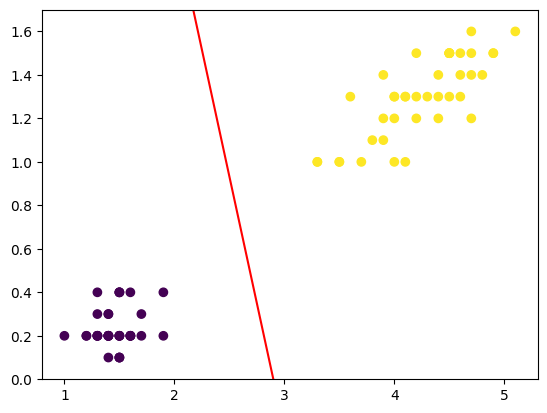

In [58]:
fig,ax = plt.subplots()

ax.scatter(X_train[3],X_train[4],c=y_train)

x = np.linspace(1,5,100)
y = (-w1*x-w0)/w2

ax.plot(x,y,'r')

ax.set(ylim=(0,1.7))

plt.show()

In [ ]:
fig,ax = plt.subplots()

ax.scatter(X_train[3],X_train[4],c=y_train)

x = np.linspace(1,5,100)
y = (-w1*x-w0)/w2
ax.plot(x,y,'r')

y2 = (1-w1*x-w0)/w2
ax.plot(x,y2,'--r')

y3 = (-1-w1*x-w0)/w2
ax.plot(x,y3,'--r')

ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],c='r')

ax.set(ylim=(0,1.7))

plt.show()

### Usando a base toda

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import numpy as np

url = "https://raw.githubusercontent.com/tmoura/machinelearning/master/iris.data"

# Carregar base de dados
dataset = pd.read_csv(url, header=None)

columns = len(dataset.columns)

y = dataset[0] # extrai a primeira coluna, que é o label
X = dataset.loc[:,1:columns-1]

## Mormalização dos atributos
df = X.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)
X = pd.DataFrame(x_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=16) # 80% treino e 20% teste

model = SVC()
model = model.fit(X_train, y_train)

In [ ]:
result = model.predict(X_test)
acc = metrics.accuracy_score(result, y_test)
show = round(acc * 100)
print("{}%".format(show))

print(list(result))
print(list(y_test))